# More influence plots of IBM/non-IBM users
Author :Daheng Wang  
Last modified: 2017-05-08

# Roadmap
1. Plot influences of IBM/non-IBM users based on simple influence measurement
2. Try different measurements of influence and plot
3. Plots based on different user characteristics

# Steps

## Initialization

In [1]:
# Data analysis modules: pandas, matplotlib, numpy, and etc.
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Standard modules, MongoDB modules
import os, sys, json, datetime, pickle, multiprocessing, logging
from pprint import pprint

import pymongo
from pymongo import IndexModel, ASCENDING, DESCENDING

# Custom tool modules
import mongodb  # module for setting up connection with (local) MongoDB database
import multiprocessing_workers  # module for splitting workloads between processes
import utilities  # module for various custom utility functions
from config import * # import all global configuration variables

## Plot compound influences of IBM/non-IBM users

_Step 1_ Read in method_1, method_2, simple_influence pickles.

In [2]:
if 1 == 1:
    # read in simple_influence pickle
    df = pd.read_pickle(SIMPLE_INFLUENCE_PKL)
    
    # clean and preparations
    df = df.fillna(0)
    
    # read in method_1, method_2 results
    m1_ibm_user_ids_lst = []
    m2_ibm_user_ids_lst = []
    
    if not m1_ibm_user_ids_lst:
        with open(M1_IBM_USER_IDS_PKL, 'rb') as f:
            m1_ibm_user_ids_lst = pickle.load(f)
            
    if not m2_ibm_user_ids_lst:
        with open(M2_IBM_USER_IDS_PKL, 'rb') as f:
            m2_ibm_user_ids_lst = pickle.load(f)
    
    m1_ibm_user_ids_set = set(m1_ibm_user_ids_lst)
    m2_ibm_user_ids_set = set(m2_ibm_user_ids_lst)
    
    m1_ibm_cond = df['uid'].isin(m1_ibm_user_ids_set)
    df_m1_ibm = df[m1_ibm_cond]
    
    m1_nonibm_cond = ~df['uid'].isin(m1_ibm_user_ids_set)
    df_m1_nonibm = df[m1_nonibm_cond]
    
    m2_ibm_cond = df['uid'].isin(m2_ibm_user_ids_set)
    df_m2_ibm = df[m2_ibm_cond]
    
    m2_nonibm_cond = ~df['uid'].isin(m2_ibm_user_ids_set)
    df_m2_nonibm = df[m2_nonibm_cond]

_Step 2 Plot_

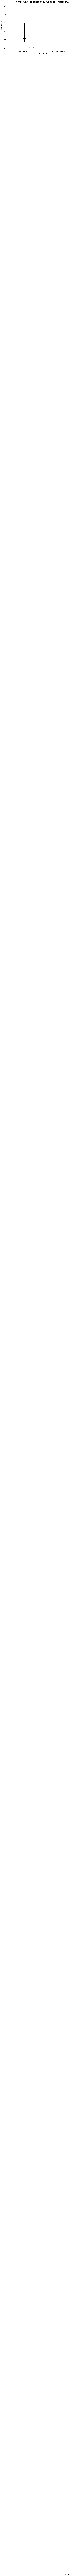

In [4]:
compound_influence_m1_fig = os.path.join(FIG_DIR, 'compound_influence_m1.png')
if 1 == 1:
    '''
    Prepare data
    '''
    # IBM users
    m1_ibm_avg_a_trc = df_m1_ibm['a_trc'] / df_m1_ibm['a_n']
    m1_ibm_cleaned_fo = df_m1_ibm['fo'].replace(to_replace=0, value=1)
    m1_ibm_compound_influence = m1_ibm_avg_a_trc * np.log(m1_ibm_cleaned_fo)
    
    # non-IBM users
    m1_nonibm_avg_a_trc = df_m1_nonibm['a_trc'] / df_m1_nonibm['a_n']
    m1_nonibm_cleaned_fo = df_m1_nonibm['fo'].replace(to_replace=0, value=1)
    m1_nonibm_compound_influence = m1_nonibm_avg_a_trc * np.log(m1_nonibm_cleaned_fo)
    
    data = [m1_ibm_compound_influence, m1_nonibm_compound_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['4,782 IBM users', '351,766 non-IBM users'])
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Compound influence of IBM/non-IBM users M1', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('User types', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    
    '''
    Save figure
    '''
    plt.savefig(compound_influence_m1_fig, dpi=200)

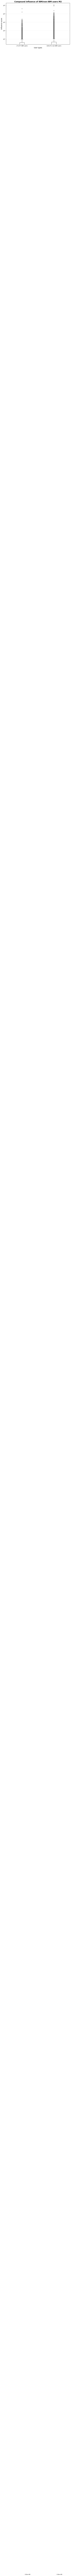

In [7]:
compound_influence_m2_fig = os.path.join(FIG_DIR, 'compound_influence_m2.png')
if 1 == 1:
    '''
    Prepare data
    '''
    # IBM users
    m2_ibm_avg_a_trc = df_m2_ibm['a_trc'] / df_m2_ibm['a_n']
    m2_ibm_cleaned_fo = df_m2_ibm['fo'].replace(to_replace=0, value=1)
    m2_ibm_compound_influence = m2_ibm_avg_a_trc * np.log(m2_ibm_cleaned_fo)
    
    # non-IBM users
    m2_nonibm_avg_a_trc = df_m2_nonibm['a_trc'] / df_m2_nonibm['a_n']
    m2_nonibm_cleaned_fo = df_m2_nonibm['fo'].replace(to_replace=0, value=1)
    m2_nonibm_compound_influence = m2_nonibm_avg_a_trc * np.log(m2_nonibm_cleaned_fo)
    
    data = [m2_ibm_compound_influence, m2_nonibm_compound_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['27,077 IBM users', '329,471 non-IBM users'])
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Compound influence of IBM/non-IBM users M2', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('User types', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    '''
    Save figure
    '''
    plt.savefig(compound_influence_m2_fig, dpi=200)

## Plot weighted influences of IBM/non-IBM users

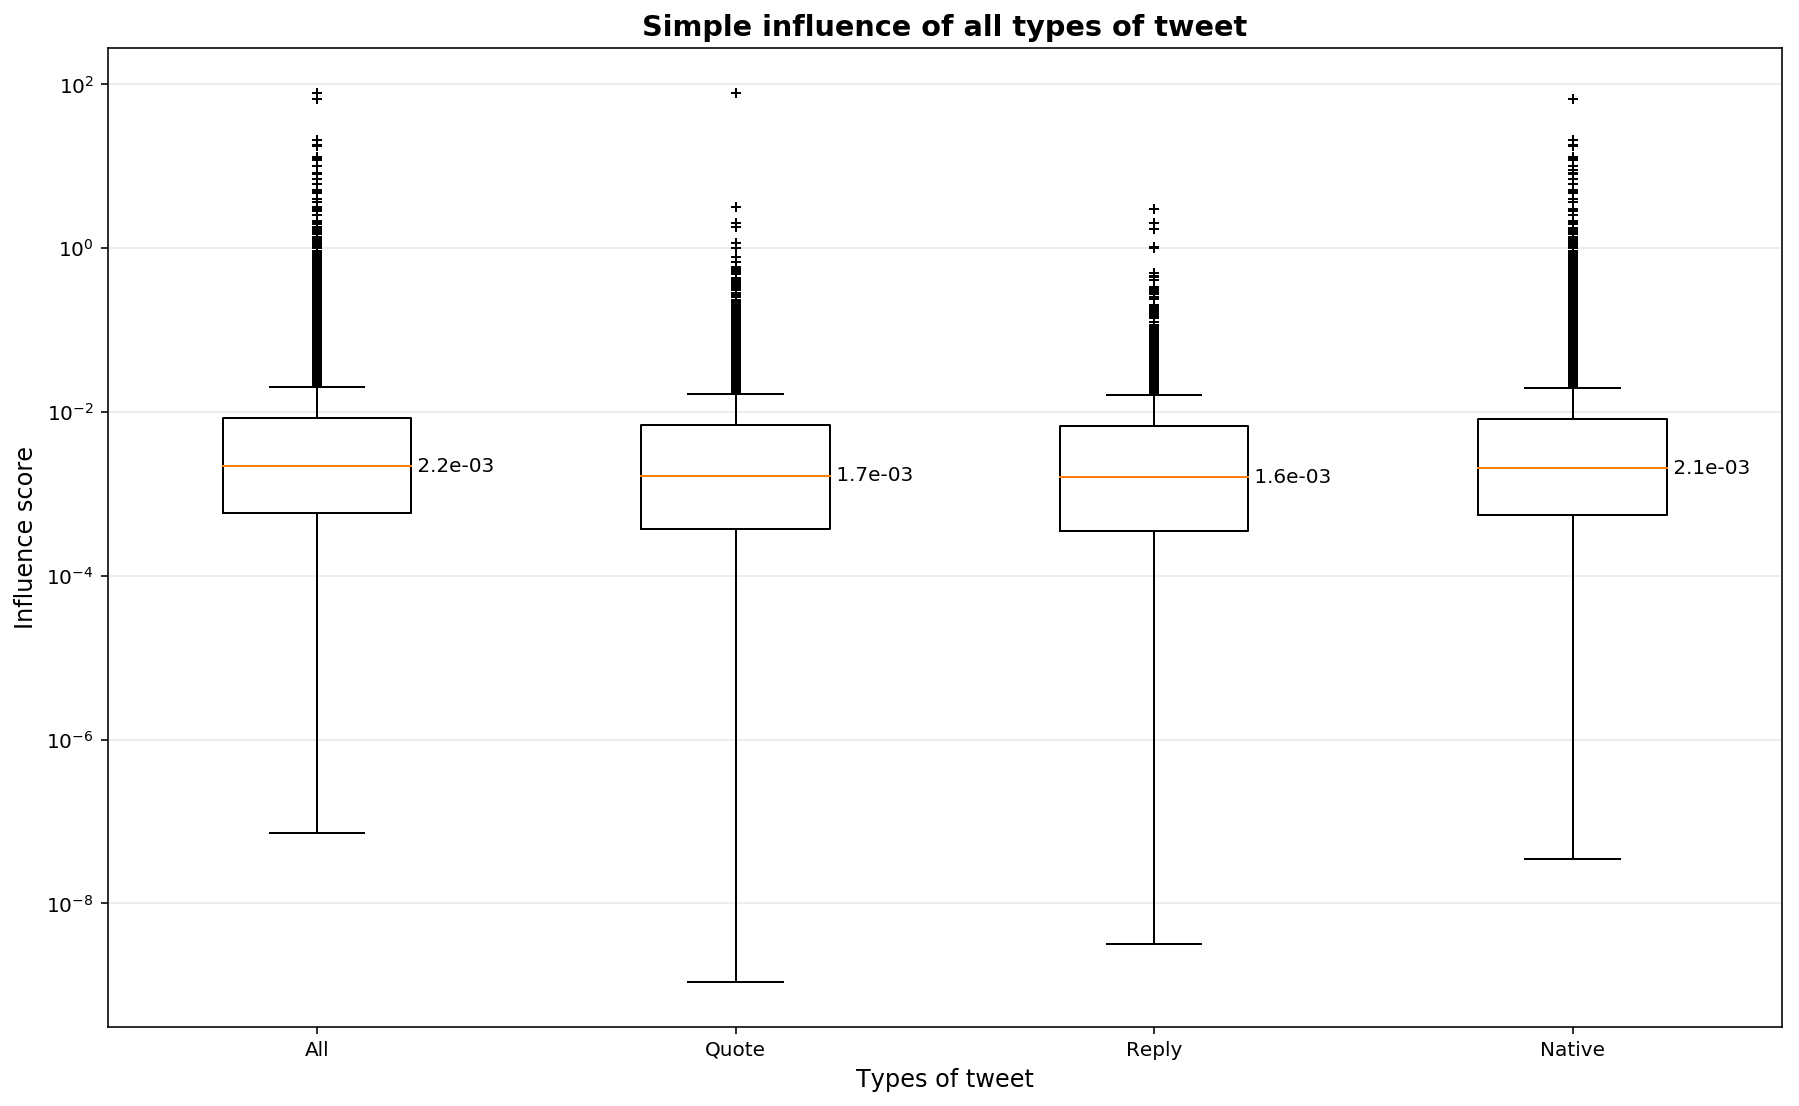

In [9]:
simple_influence_all_types_of_tweets_fig = os.path.join(FIG_DIR, 'simple_influence_all_types_of_tweets.png')
# plot simple influence by different types of tweets
if 1 == 1:
    '''
    Prepare data
    '''
    norm_s = df['fo'] * df['a_n']
    norm_s = norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    
    a_trc_s = df['a_trc'].replace(to_replace=0, value=1)
    a_influence = a_trc_s / norm_s
        
    q_trc_s = df['q_trc'].replace(to_replace=0, value=1)
    q_influence = q_trc_s / norm_s
    
    p_trc_s = df['p_trc'].replace(to_replace=0, value=1)
    p_influence = p_trc_s / norm_s
    
    n_trc_s = df['n_trc'].replace(to_replace=0, value=1)
    n_influence = n_trc_s / norm_s
    
    data = [a_influence, q_influence, p_influence, n_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(15, 9))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Simple influence of all types of tweet', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('Types of tweet', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_xticklabels(['All', 'Quote', 'Reply', 'Native'])
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    
    '''
    Save figure
    '''
    plt.savefig(simple_influence_all_types_of_tweets_fig, dpi=200)

In [11]:
weighted_influence_m1_fig = os.path.join(FIG_DIR, 'weighted_influence_m1.png')
if 1 == 1:
    '''
    Prepare data
    '''
    n_w = 1.5
    q_w = 0.9
    p_w = 0.6
    
    # IBM users
    m1_ibm_a_norm_s = (df_m1_ibm['fo'] * df_m1_ibm['a_n']).replace(to_replace=0, value=1)
    m1_ibm_a_influence = (df_m1_ibm['a_trc'] / m1_ibm_a_norm_s)
        
    m1_ibm_q_norm_s = (df_m1_ibm['fo'] * df_m1_ibm['q_n']).replace(to_replace=0, value=1)
    m1_ibm_q_influence = df_m1_ibm['q_trc'] / m1_ibm_q_norm_s
    
    m1_ibm_p_norm_s = (df_m1_ibm['fo'] * df_m1_ibm['p_n']).replace(to_replace=0, value=1)
    m1_ibm_p_influence = df_m1_ibm['p_trc'] / m1_ibm_p_norm_s
    
    m1_ibm_n_norm_s = (df_m1_ibm['fo'] * df_m1_ibm['n_n']).replace(to_replace=0, value=1)
    m1_ibm_n_influence = df_m1_ibm['n_trc'] / m1_ibm_n_norm_s
    
    m1_ibm_a_influence_weighted = \
        m1_ibm_q_influence * q_w + \
        m1_ibm_p_influence * p_w + \
        m1_ibm_n_influence * n_w
    
    # non-IBM users
    m1_nonibm_a_norm_s = (df_m1_nonibm['fo'] * df_m1_nonibm['a_n']).replace(to_replace=0, value=1)
    m1_nonibm_a_influence = (df_m1_nonibm['a_trc'] / m1_nonibm_a_norm_s)
    
    m1_nonibm_q_norm_s = (df_m1_nonibm['fo'] * df_m1_nonibm['q_n']).replace(to_replace=0, value=1)
    m1_nonibm_q_influence = df_m1_nonibm['q_trc'] / m1_nonibm_q_norm_s
    
    m1_nonibm_p_norm_s = (df_m1_nonibm['fo'] * df_m1_nonibm['p_n']).replace(to_replace=0, value=1)
    m1_nonibm_p_influence = df_m1_nonibm['p_trc'] / m1_nonibm_p_norm_s
    
    m1_nonibm_n_norm_s = (df_m1_nonibm['fo'] * df_m1_nonibm['n_n']).replace(to_replace=0, value=1)
    m1_nonibm_n_influence = df_m1_nonibm['n_trc'] / m1_nonibm_n_norm_s
    
    m1_nonibm_a_influence_weighted = \
        m1_nonibm_q_influence * q_w + \
        m1_nonibm_p_influence * p_w + \
        m1_nonibm_n_influence * n_w
    
    data = [m1_ibm_a_influence,
            m1_ibm_a_influence_weighted,
            m1_nonibm_a_influence,
            m1_nonibm_a_influence_weighted
           ]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(12, 9))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    ax.set_xticklabels(['4,782 IBM users', '4,782 IBM users (weighted)', '351,766 non-IBM users', '351,766 non-IBM users (weighted)'])
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title('Weighted simple influence of IBM/non-IBM users m1', fontdict=title_fontdict)
    
    label_fontdict = {'size': 'large'}
    ax.set_xlabel('User types', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')

    
    '''
    Save figure
    '''
    plt.savefig(weighted_influence_m1_fig, dpi=200)